For all the examples, we have the following true model

$y=\mathbf{X}\mathbf\beta+ \mathbf{\epsilon}$

where
$\mathbf{\epsilon} \sim \mbox{Norm}(\mathbf{0}, \mathbf{I})$

# Example 1
Small signal. Lots of noise.

$\mathbf\beta=(\underbrace{1,...,1}_{15},\underbrace{0,...,0}_{4085})^T$

$p=5000>n=1000$

Uncorrelated predictors: 

$X_i \overset{iid}{\sim} \mbox{Norm}(\mathbf{0}, \mathbf{I})$

In [2]:
library(MASS)  # Package needed to generate correlated precictors
library(glmnet)  # Package to fit ridge/lasso/elastic net models

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [3]:
# Generate data
set.seed(19875)  # Set seed for reproducibility
n <- 1000  # Number of observations
p <- 5000  # Number of predictors included in model
real_p <- 15  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train (2/3) and test (1/3) sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [4]:
# Fit models 
# (For plots on left):
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
# (For plots on Right)
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", alpha=i/10,family="gaussian"))
}

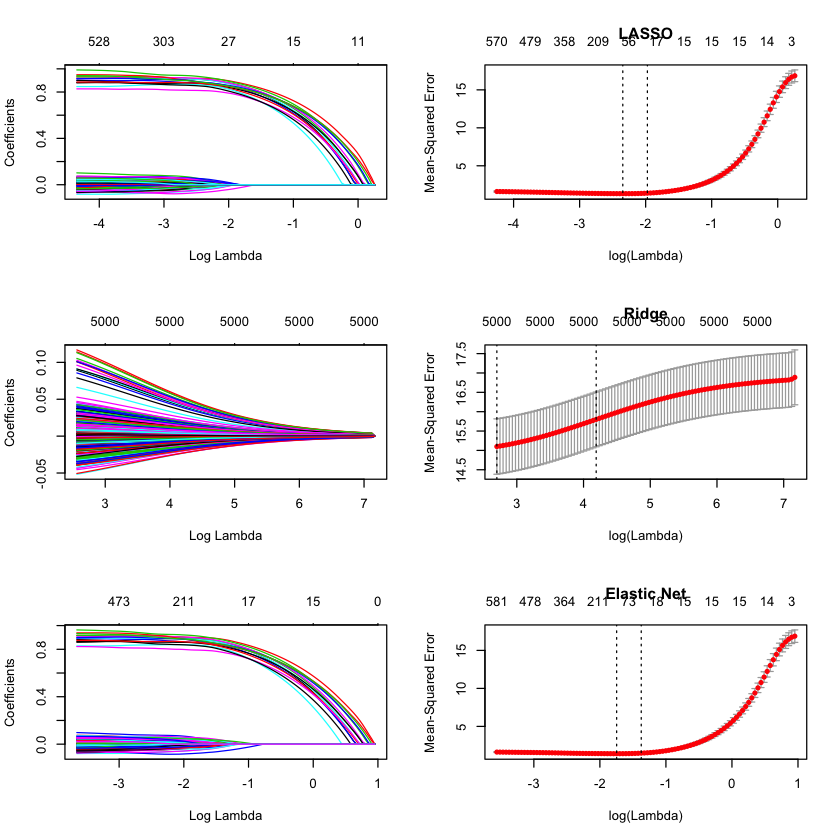

In [5]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

## MSE on test set

In [6]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

In [24]:
mse0
mse2
mse4
mse5
mse6
mse8
mse10

[1] 16.15805

[1] 1.806264

[1] 1.435072

[1] 1.461276

[1] 1.414649

[1] 1.442729

[1] 1.375904

LASSO is the winner! LASSO is good at picking up a small signal through lots of noise.

# Example 2
Big signal and big noise.

$\mathbf\beta=(\underbrace{1,...,1}_{1500},\underbrace{0,...,0}_{3500})^T$

$p=5000>n=1000$

Uncorrelated predictors: 

$X_i \overset{iid}{\sim} \mbox{Norm}(\mathbf{0}, \mathbf{I})$

Note that LASSO can pick at max 1000 predictors


In [25]:
# Generate data
set.seed(19874)
n <- 1000    # Number of observations
p <- 5000     # Number of predictors included in model
real_p <- 1500  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train and test sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [26]:
# Fit models:
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
fit.lasso.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=1, 
                          family="gaussian")
fit.ridge.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=0,
                          family="gaussian")
fit.elnet.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=.5,
                          family="gaussian")

for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="gaussian"))
}

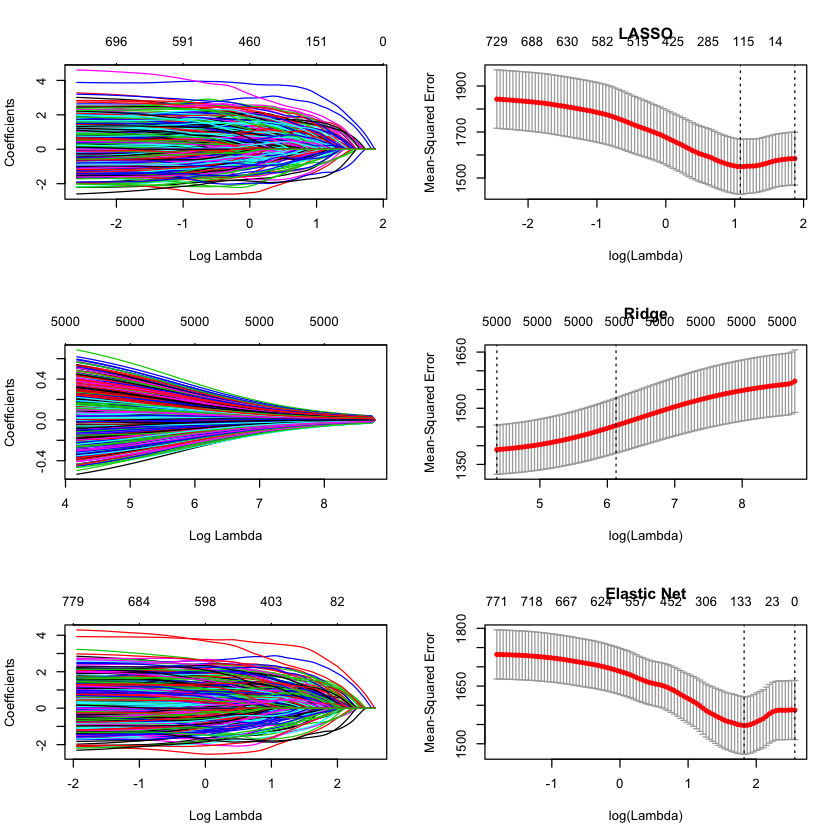

In [27]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

## MSE on test set

In [28]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

In [32]:
mse0 # Ridge
mse2
mse4
mse5
mse6
mse8
mse10 # Lasso

[1] 1494.07

[1] 1637.895

[1] 1641.141

[1] 1641.141

[1] 1633.547

[1] 1641.141

[1] 1641.141

Ridge is the winner! Ridge in general is good at prediction, but is not very interpretable.

# Example 3
Varying signals. High correlation between predictors

* $\mathbf\beta=(10, 10, 5, 5, \underbrace{1,...,1}_{10},\underbrace{0,...,0}_{36})^T$

* $p = 50$

* $n = 100$

* Correlated predictors: $\mbox{Cov}(\mathbf{X})_{ij}=(0.7)^{|i−j|}$


In [33]:
# Generate data
set.seed(19873)
n <- 100    # Number of observations
p <- 50     # Number of predictors included in model
CovMatrix <- outer(1:p, 1:p, function(x,y) {.7^abs(x-y)})
x <- mvrnorm(n, rep(0,p), CovMatrix)
y <- 10 * apply(x[, 1:2], 1, sum) +  5 * apply(x[, 3:4], 1, sum) + apply(x[, 5:14], 1, sum) + rnorm(n)

# Split data into train and test sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [34]:
# Fit models:
fit.lasso <- glmnet(x.train, y.train, family="gaussian", alpha=1)
fit.ridge <- glmnet(x.train, y.train, family="gaussian", alpha=0)
fit.elnet <- glmnet(x.train, y.train, family="gaussian", alpha=.5)


# 10-fold Cross validation for each alpha = 0, 0.1, ... , 0.9, 1.0
fit.lasso.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=1, family="gaussian")
fit.ridge.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=0, family="gaussian")
fit.elnet.cv <- cv.glmnet(x.train, y.train, type.measure="mse", alpha=.5, family="gaussian")

for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(x.train, y.train, type.measure="mse", alpha=i/10,family="gaussian"))
}

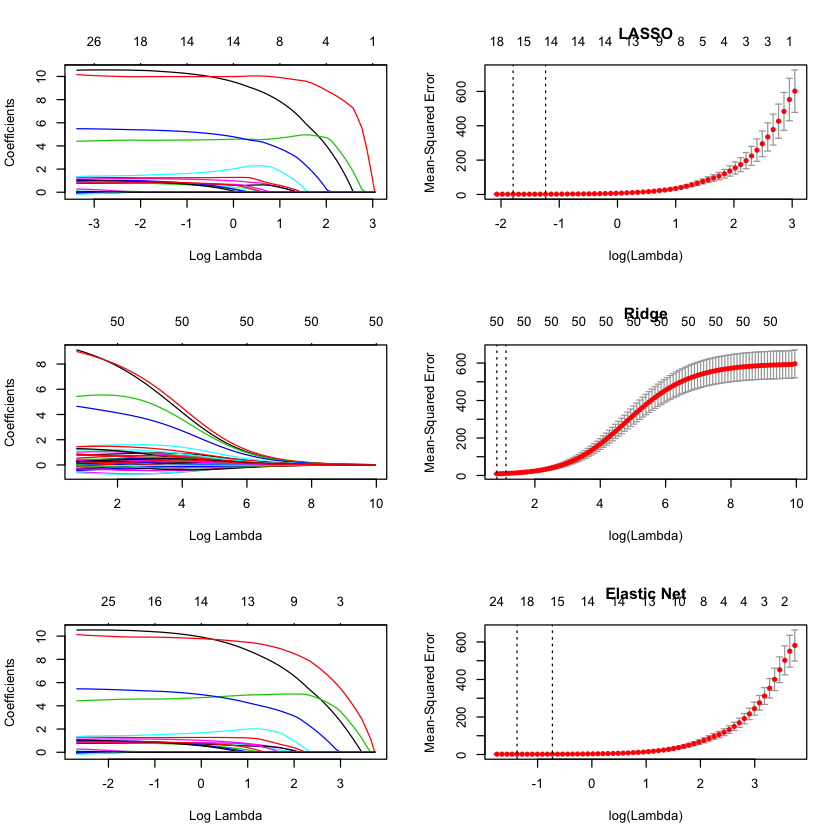

In [35]:
# Plot solution paths:
par(mfrow=c(3,2))
# For plotting options, type '?plot.glmnet' in R console
plot(fit.lasso, xvar="lambda")
plot(fit10, main="LASSO")

plot(fit.ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(fit.elnet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [36]:
yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 <- predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 <- predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 <- predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 <- predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 <- predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 <- predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 <- predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 <- predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=x.test)

mse0 <- mean((y.test - yhat0)^2)
mse1 <- mean((y.test - yhat1)^2)
mse2 <- mean((y.test - yhat2)^2)
mse3 <- mean((y.test - yhat3)^2)
mse4 <- mean((y.test - yhat4)^2)
mse5 <- mean((y.test - yhat5)^2)
mse6 <- mean((y.test - yhat6)^2)
mse7 <- mean((y.test - yhat7)^2)
mse8 <- mean((y.test - yhat8)^2)
mse9 <- mean((y.test - yhat9)^2)
mse10 <- mean((y.test - yhat10)^2)

In [37]:
mse0 # Ridge
mse2
mse4
mse5
mse6
mse8
mse10 # Lasso

[1] 7.391021

[1] 1.246134

[1] 1.49475

[1] 1.512046

[1] 1.421853

[1] 1.49853

[1] 1.715183

Elastic Net is the winner! It’s interesting to note the best solution is “close” to Ridge, but Ridge (α=0) in fact performs the worst.

# Reference

The materials used in this demo are from 

https://www4.stat.ncsu.edu/~post/josh/LASSO_Ridge_Elastic_Net_-_Examples.html
